<div style="background-color : white; border-radius: 15px; width: 93%; padding: 2em; color: black; font-family: Gill Sans, sans-serif;">
<h1 style ="text-align: center; color: black; font-family: Gill Sans, sans-serif;font-weight: 700;"> Test del mio algoritmo su dataset ammissione college</h1>
<h2>Indice</h2>

<ol type="1">
    <li style="padding-top: 0.3em; padding-bottom: 0.3em;"><b>Modello implementato</b></li>
    <li style="padding-top: 0.3em; padding-bottom: 0.3em;"><b>Preparazione dataset</b>
        <ul>       
            <li style="padding-top: 0.3em; padding-bottom: 0.3em;">2.1 Caricamento dataset</li>
            <li style="padding-bottom: 0.3em;">2.2 Struttura dei dati
                <ul>
                    <li style="padding-top: 0.3em; padding-bottom: 0.3em;">2.2.1 Shape del dataset</li>
                    <li style="padding-bottom: 0.3em;">2.2.2 Intestazione dei dati</li>
                    <li style="padding-bottom: 0.3em;">2.2.3 Tipi di dati</li>
                    <li style="padding-bottom: 0.3em;">2.2.4 Visualizzazione di alcuni dati</li>
                    <li style="padding-bottom: 0.3em;">2.2.5 Statistiche dei dati</li>
                    <li>2.2.6 Valori nulli</li>
                </ul>
            </li>
            <li style="padding-bottom: 0.3em;">2.3 Grafici sul dataset
                <ul>
                    <li style="padding-top: 0.3em; padding-bottom: 0.3em;">2.3.1 Bilanciamento dei valori target</li>
                    <li style="padding-bottom: 0.3em;">2.3.2 Distribuzione dei valori delle features</li>
                    <li style="padding-bottom: 0.3em;">2.3.3 Correlation Matrix</li>
                    <li style="padding-bottom: 0.3em;">2.3.4 Distribuzione delle features in base al target</li>
                    <li>2.3.5 Pairplot in base al target</li>
                </ul>
            </li>
        </ul>
    </li>
    <li style="padding-top: 0.3em; padding-bottom: 0.3em;"><b>Preparazione dataset</b>
        <ul>
            <li style="padding-top: 0.3em; padding-bottom: 0.3em;">3.1 Divisione del dataset in train e test set</li>
            <li style="padding-bottom: 0.3em;">3.2 Manipolazione dei dati</li>
            <li>3.3 Normalizzazione dei dati</li>
        </ul>
    </li>
    <li style="padding-top: 0.3em; padding-bottom: 0.3em;"><b>Applicazione del modello</b>
        <ul>
            <li style="padding-top: 0.3em; padding-bottom: 0.3em;">4.1 Allenamento del modello</li>
            <li>4.2 Risultati del modello allenato</li>
        </ul>
    </li>
    <li style="padding-top: 0.3em; padding-bottom: 0.3em;"><b>Valutazione del modello</b>
        <ul>
            <li style="padding-top: 0.3em; padding-bottom: 0.3em;">5.1 Metrica d'errore</li>
            <li style="padding-bottom: 0.3em;">5.2 Confusion Matrix</li>
            <li style="padding-bottom: 0.3em;">5.3 Curva precision e recall</li>
            <li>5.4 Curva ROC e AUC</li>
        </ul>
    </li>
</ol>
</div>

<div style="background-color: white; border-top-left-radius: 15px; border-top-right-radius: 15px; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <a id="#intro" style="text-decoration:none; color: black;"><h3 style="font-weight:700;"> 1. Modello implementato </h3></a>
</div>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, f1_score, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import random

def logistic(z):
    den = 1 + np.exp(-z)
    sigm = 1.0/den
    return sigm

def hyp(W,X):
    param = np.dot(W,X.T)
    return logistic(param)

def cost(W,X,Y):
    m = X.shape[0]
    h = hyp(W,X)
    log_h = np.log(h)
    log_one_h = np.log(1-h)
    l_cost = float((-1.0/m) * ((np.dot(log_h,Y)) + (np.dot(log_one_h,(1-Y)))))
    return l_cost

def gradient_ascent(X,W,Y,alpha,stop):
    m,n = X.shape
    cost_old = np.inf
    cost_new = cost(W,X,Y)
    print(cost_old - cost(W,X,Y))
    sum = 0
    iter = 0

    while(abs(cost_old-cost_new) > stop):
        for j in range(0,n):
            for i in range(0,m):
                sum += (Y[i][0] - hyp(W,X[i])) * X[i][j]
            W[0][j] = W[0][j] + (alpha/m) * sum
        cost_old = cost_new
        cost_new = cost(W,X,Y)
        print(cost_old - cost(W,X,Y))
        iter += 1

    print(W)
    return iter  

def prediction(W,X,Y):
    m = X.shape[0]
    h = hyp(W,X)
    Y_hat = h > 0.5
    accuracy = 1.0/m * np.sum(Y.T == Y_hat)
    return accuracy, Y_hat, h

<div style="background-color: white; border-bottom-left-radius:15px; border-bottom-right-radius:15px; width:93%; padding:2em 2em 0.2em 2em; font-family:Gill Sans, sans-serif;">
</div>

<div style="background-color: white; border-top-left-radius: 15px; border-top-right-radius: 15px; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <a id="#intro" style="text-decoration:none; color: black;"><h3 style="font-weight:700;"> 2. Preparazione del dataset </h3></a>
    <h4 style="color:black"> 2.1 Caricamento del dataset </h4>
</div>

In [3]:
# Carico il dataset
path = './ex2data1.txt'
data = pd.read_csv(path, header=None, names=["Ex1","Ex2","classificazione"])

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 2.2 Struttura dei dati </h4>
    <h5 style="color: black;"> 2.2.1 Shape del dataset </h5>
</div>

In [4]:
data.shape

(100, 3)

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h5 style="color: black;"> 2.2.2 Intestazione dei dati </h5>
</div>

In [5]:
data_name = data.columns.values.tolist()
data_name

['Ex1', 'Ex2', 'classificazione']

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h5 style="color: black;"> 2.2.3 Tipi di dati </h5>
</div>

In [6]:
data.dtypes

Ex1                float64
Ex2                float64
classificazione      int64
dtype: object

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h5 style="color: black;"> 2.2.4 Visualizzazione di alcuni dati </h5>
</div>

In [7]:
data.head()

,Ex1,Ex2,classificazione
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h5 style="color: black;"> 2.2.5 Statistiche sui dati </h5>
</div>

In [8]:
data.describe().round(2)

,Ex1,Ex2,classificazione
count,100.00,100.00,100.00
mean,65.64,66.22,0.60
std,19.46,18.58,0.49
min,30.06,30.60,0.00
25%,50.92,48.18,0.00
50%,67.03,67.68,1.00
75%,80.21,79.36,1.00
max,99.83,98.87,1.00


<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h5 style="color: black;"> 2.2.6 Valori nulli </h5>
</div>

In [9]:
data.isna().sum()

Ex1                0
Ex2                0
classificazione    0
dtype: int64

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 2.3 Grafici sul dataset </h4>
    <h5 style="color: black;"> 2.3.1 Bilanciamento dei valori target </h5>
</div>

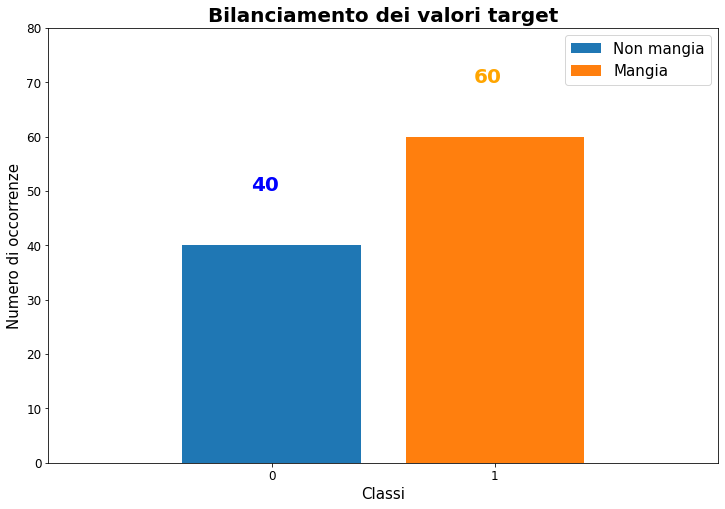

In [10]:
data_class_0_len = len(data[data.classificazione == 0])
data_class_1_len = len(data[data.classificazione == 1])

fig, ax = plt.subplots(figsize=(12,8))
plt.title("Bilanciamento dei valori target", fontsize=20, fontweight='bold')
ax.bar(0,data_class_0_len, label='Non mangia', align="center")
ax.bar(1,data_class_1_len, label='Mangia', align="center")

ax.set(xticks=range(2), xlim=[-1, 2])
ax.set(ylim=[0, 80])
ax.text(0-0.093,data_class_0_len + 10,str(data_class_0_len), color='blue', fontweight='bold', fontsize=20)
ax.text(1-0.093,data_class_1_len + 10,str(data_class_1_len), color='orange', fontweight='bold', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.legend(fontsize=15)
ax.set_xlabel('Classi', fontsize=15)
ax.set_ylabel('Numero di occorrenze', fontsize=15)
plt.show()

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 2.3.2 Distribuzione dei valori delle features</h4>
</div>

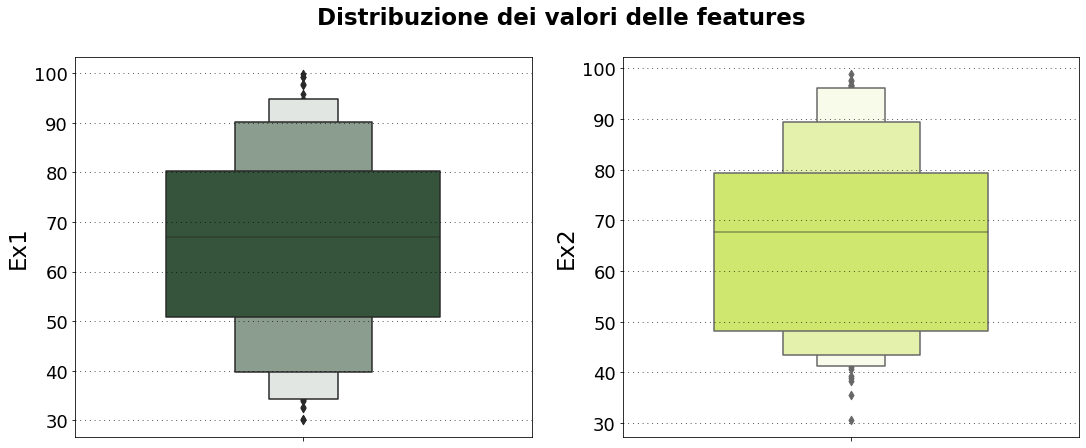

In [11]:
fig, axs = plt.subplots(1,2, figsize=(18,7))
plt.suptitle("Distribuzione dei valori delle features", fontsize=23, fontweight='bold')
cnt = 0

for col in range(0,2):
    color = rand_colors = ["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])]

    if(cnt <= len(data_name)-2):
        sns.boxenplot(ax=axs[col],y=data[data_name[cnt]],palette=color,width=0.6)
        axs[col].grid(color="#000000", linestyle=':', axis='y', zorder=0,  dashes=(1,5))
        axs[col].tick_params(axis='y', labelsize=18)
        axs[col].yaxis.label.set_size(18)
        axs[col].set_ylabel(data_name[cnt], fontsize=23)

        cnt += 1

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 2.3.3 Correlation Matrix</h4>
</div>

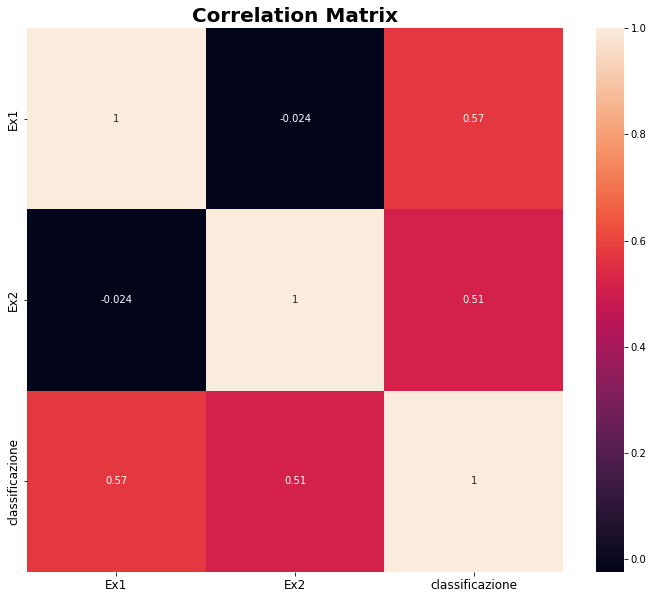

In [12]:
plt.subplots(figsize=(12,10))

plt.title("Correlation Matrix", fontsize=20, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 2.3.4 Distribuzione delle features in base al target </h4>
</div>

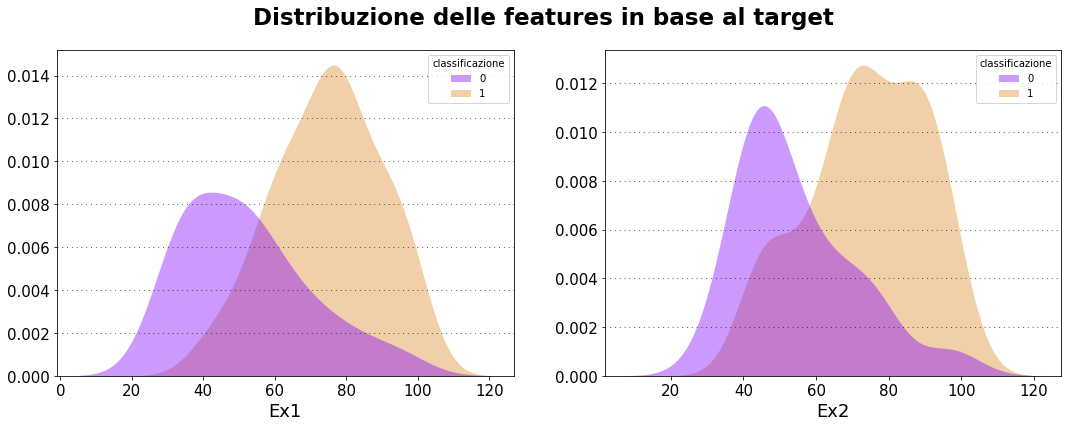

In [13]:
fig, axs = plt.subplots(1,2, figsize=(18,6))
plt.suptitle("Distribuzione delle features in base al target", fontsize=23, fontweight='bold')
cnt = 0

for col in range(0,2):
    if(cnt <= len(data_name)-2):
        sns.kdeplot(ax=axs[col], data=data, x=data_name[cnt],hue=data_name[2], fill=True,palette=["#8000ff","#da8829"], alpha=.4, linewidth=0)
        axs[col].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
        axs[col].set_xlabel(data_name[cnt], fontsize=18)
        axs[col].set_ylabel("")

        axs[col].tick_params(axis='y', labelsize=15)
        axs[col].tick_params(axis='x', labelsize=15)          

        cnt += 1

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 2.3.5 Pairplot in base al target </h4>
</div>

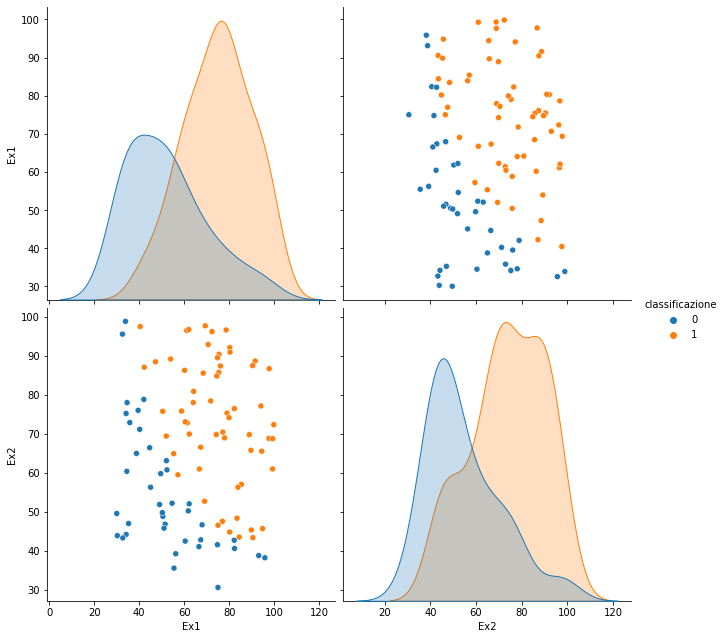

In [14]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(data, hue=data_name[len(data_name)-1], size=4.5)

<div style="background-color: white; border-bottom-left-radius:15px; border-bottom-right-radius:15px; width:93%; padding:2em 2em 0.2em 2em; font-family:Gill Sans, sans-serif;">
</div>

<div style="background-color: white; border-top-left-radius: 15px; border-top-right-radius: 15px; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <a id="#intro" style="text-decoration:none; color: black;"><h3 style="font-weight:700;"> 3. Preparazione del dataset </h3></a>
    <h4 style="color:black"> 3.1 Divisione del dataset in train e test set </h4>
</div>

In [15]:
# Creo train e test set
X_train, X_test, Y_train, Y_test = train_test_split(data[["Ex1","Ex2"]], data[['classificazione']], test_size=0.23)

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 3.2 Manipolazione dei dati </h4>
    <ul style="color: black;">
        <li>Tutti i set sono convertiti in array numpy</li>
        <li>Alle features viene aggiunto il bias della funzione d'ipotesi (θ<sub>0</sub>)</li>
        <li>Viene inizializzato il vettore dei pesi</li>
    </ul>
</div>

In [16]:
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

m_tr, n_tr = X_train.shape
X_train = np.concatenate((np.ones((m_tr,1)), X_train), axis=1)
n_tr +=1

m_te, n_te = X_test.shape
X_test = np.concatenate((np.ones((m_te,1)), X_test), axis=1)
n_te += 1

W = np.array(np.zeros((1,n_te)))

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 3.3 Normalizzazione dei dati </h4>
</div>

In [17]:
# Normalizzo i dati
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

<div style="background-color: white; border-bottom-left-radius:15px; border-bottom-right-radius:15px; width:93%; padding:2em 2em 0.2em 2em; font-family:Gill Sans, sans-serif;">
</div>

<div style="background-color: white; border-top-left-radius: 15px; border-top-right-radius: 15px; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <a id="#intro" style="text-decoration:none; color: black;"><h3 style="font-weight:700;"> 4. Applicazione del modello </h3></a>
    <h4 style="color:black"> 4.1 Allenamento del modello</h4>
</div>

In [18]:
gradient_ascent(X_train,W,Y_train,0.001,0.0001)

inf
0.00022033268200427614
0.0005136772757535768
0.0008060173588000374
0.0010967593598716352
0.0013853128498442224
0.0016710918038903566
0.0019535158971420996
0.002232011841383663
0.0025060147693543033
0.0027749696720827943
0.0030383328932916953
0.0032955736833274463
0.0035461758132483423
0.0037896392476809426
0.004025481872836689
0.0042532412736764336
0.004472476551646842
0.004682770171765105
0.0048837298250793415
0.005074990289802628
0.005256215271753462
0.005427099202201302
0.005587368968948847
0.005736785554521839
0.005875145553829952
0.006002282542699744
0.00611806826831951
0.006222413633031665
0.0063152694440608
0.006396626903750646
0.006466517817735884
0.006525014502134385
0.006572229375311878
0.0066083142249169224
0.006633459146617726
0.00664789115711073
0.006651872490359589
0.006645698592412819
0.006629695836386285
0.006604218984992305
0.006569648433211395
0.006526387268095957
0.006474858186161003
0.006415500311195588
0.00634876595658751
0.006275117376354611
0.0061950235480477

117

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 3.2 Risultati del modello allenato </h4>
    <p style="color: black;">Train accurancy dell'esercitazione: 0,89</p>
</div>

In [19]:
train_accurancy, train_predictions, train_prob_predictions = prediction(W,X_train,Y_train)
test_accurancy, test_predictions, test_prob_predictions = prediction(W,X_test,Y_test)

print("### MyLog:\n\tAccuracy of training: " + str(train_accurancy)+"\n\tAccuracy of test: " + str(test_accurancy))
print("### MyLog:\n\tError rate of training: " + str(1 - train_accurancy)+"\n\tError rate of test: " + str(1 - test_accurancy))

### MyLog:
	Accuracy of training: 0.8571428571428572
	Accuracy of test: 0.8695652173913043
### MyLog:
	Error rate of training: 0.1428571428571428
	Error rate of test: 0.13043478260869568


<div style="background-color: white; border-bottom-left-radius:15px; border-bottom-right-radius:15px; width:93%; padding:2em 2em 0.2em 2em; font-family:Gill Sans, sans-serif;">
</div>

<div style="background-color: white; border-top-left-radius: 15px; border-top-right-radius: 15px; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <a id="#intro" style="text-decoration:none; color: black;"><h3 style="font-weight:700;"> 4. Valutazione del modello </h3></a>
    <h4 style="color:black"> 4.1 Metrica d'errore</h4>
</div>

In [20]:
# metric_error = #valori classe 0 / #valori classi
metric_error = len(data[data.classificazione == 0]) / len(data)
metric_accurancy = 1 - metric_error

print("Error rate di un classificatore che predice solo 0: ", metric_error)
print("Accuracy di un classificatore che predice solo 0: ", metric_accurancy)

Error rate di un classificatore che predice solo 0:  0.4
Accuracy di un classificatore che predice solo 0:  0.6


<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 4.2 Confusion Matrix </h4>
</div>

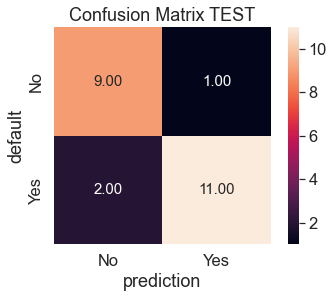

In [21]:
cm = confusion_matrix(Y_test, test_predictions.T)
plt.figure()
sns.set(font_scale=1.5)
hm = sns.heatmap( cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=['No', 'Yes'], xticklabels=['No', 'Yes'])
plt.title('Confusion Matrix TEST')
plt.ylabel('default')
plt.xlabel('prediction')
plt.show()

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 4.3 Curva precision e recall </h4>
</div>

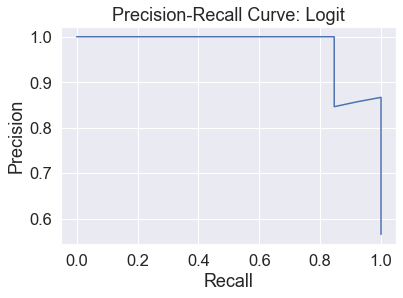

Precision:  0.8706434486992519
Recall:  0.6955128205128206
f1-score:  0.8799999999999999


In [22]:
precision, recall, thresholds = precision_recall_curve(Y_test, test_prob_predictions.T)
plt.figure()
plt.plot(recall, precision)
plt.title("Precision-Recall Curve: Logit")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

print("Precision: ", np.mean(precision))
print("Recall: ", np.mean(recall))
print("f1-score: ", f1_score(Y_test, test_predictions.T))

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 4.2 Curva ROC e AUC </h4>
</div>

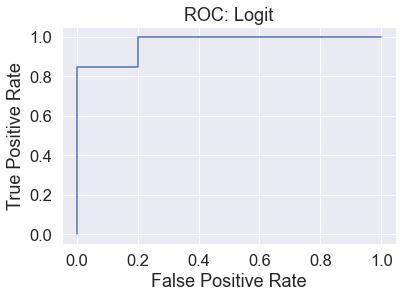

AUC:  0.8730769230769231


In [23]:
fpr, tpr, thresholds = roc_curve(Y_test, test_prob_predictions.T)
plt.figure()
plt.plot(fpr, tpr)
plt.title("ROC: Logit")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print ("AUC: ", roc_auc_score(Y_test, test_predictions.T))

<div style="background-color: white; border-bottom-left-radius:15px; border-bottom-right-radius:15px; width:93%; padding:2em 2em 0.2em 2em; font-family:Gill Sans, sans-serif;">
</div>